#EXAMEN PRIMER PARCIAL
El dataset nws.csv contiene informacion sobre las reservas de armamento nuclear en ciertos paises. Las columnas del dataset son las siguientes:

    Entity: Nombre del pais
    Code: codigo del pais
    year: año
    nuclear_weapons_stockpile: cantidad de almacenes de reservas nucleares

El objetivo es realizar un analisis de tipo clustering que permita obtener hallazgos de la informacion. Para este analisis debe aplicar criterio para seleccionar las columnas, aplicar el algoritmo y desarrollar sus conclusiones.




In [ ]:
#Dataset: https://estliveupsedu-my.sharepoint.com/:x:/g/personal/xmerino_ups_edu_ec/EcA_bQf4edZOsb0QM_ZrbSsB7vh9vC-hisc2ZDKuh-CcZg?e=80CeFx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

Evaluación:  
Se evaluará de la siguiente manera, tendremos separados por (paises) con respecto a su (cantidad de almacenes).  
Por lo tanto como objetivo tenemos la evaluación de que paises han invertido mas en armamento con relación a otros. 
  
Nota:  
He decidido omitir esta vez el tema de los años pues por aspectos políticos unos países se encuentran en conflicto bélico mientras que otros no.

In [ ]:
ds = pd.read_csv("nws.csv")
df = pd.DataFrame(ds) 

El código hace referencia al codigo abreviado del nombre del país, no lo necesitamos por ahora

In [ ]:
del(df['Code'])
del(df['Year'])

In [ ]:
df.head(-25)

,Entity,nuclear_weapons_stockpile
0,China,0
1,China,0
2,China,0
3,China,0
4,China,0
...,...,...
750,United States,11511
751,United States,10979
752,United States,10904
753,United States,11011


Tomamos valores de "Entity" que serían los nombres de nuestros países, y "nuclear_weapons_stockpile" para ver el índice armamentístico

In [ ]:
x = df["Entity"].values
y = df["nuclear_weapons_stockpile"].values

Como para hacernos una idea esa es la media de almacenaje armamentístico entre todos los países mayormente bélicos

In [ ]:
print("valores promedios de almacenes: ",round(y.mean(),3))

valores promedios de almacenes:  2686.524


Conversion a array

In [ ]:
info = df.values #nueva version de panda
info

array([[   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       ...,
       [   9., 3750.],
       [   9., 3708.],
       [   9., 3708.]])

In [ ]:
#forma 2. de convertir a array
XX=np.array(list(zip(x,y)))

NOTA IMPORTANTE:  
Durante el examen me aparecía el error "cannot convert string to float" se solucionó reiniciando el entorno y ejecutando por reiteradas ocasiones la siguiente celda

In [ ]:
from sklearn import preprocessing as pp
le = pp.LabelEncoder()
le.fit(df.Entity.unique())
df['Entity'] = le.transform(df.Entity)
df.head(-25)

,Entity,nuclear_weapons_stockpile
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
750,9,11511
751,9,10979
752,9,10904
753,9,11011


Convertimos nuestros nombres de paises a números para poderlos tratar de forma adecuada

In [ ]:
df['Entity'] = df['Entity'].astype('float64')

In [ ]:
df['Entity'].value_counts()

0.0    78
1.0    78
2.0    78
3.0    78
4.0    78
5.0    78
6.0    78
7.0    78
8.0    78
9.0    78
Name: Entity, dtype: int64

Generamos los clusters con nuestros datos

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#Se arma los grupo de agrupamiento
kn = KMeans(n_clusters=2, max_iter=3000)
kn = kn.fit(XX)

Obtenemos nuestro labels del cluster del origen de datos

In [ ]:
labels = kn.predict(XX)
centroids = kn.cluster_centers_


Colores para aplicar a la gráfica

In [ ]:
#armo los colores para graficar
colores =["m.","r.","c.","y.","g.","b."]

---

# CONCLUSIÓN

Tomando en cuenta que nuestros dos países con más almacén de armamento son el 6 (RUSSIA) y el 9 (ESTADOS UNIDOS).  
Son los que a lo largo de los años han tenido la mayor cantidad de material bélico

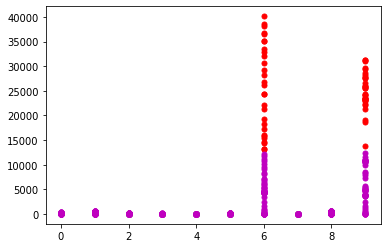

In [ ]:
for i in range(len(XX)):
  #print(f"coordenada: {X[i]} Label: {labels[i]}")
  plt.plot(XX[i][0],XX[i][1], colores[labels[i]], markersize=10)
#plt.scatter(centroids[:,0],centroids[:,1],marker="+",s=100,linewidths=5,zorder=10)
plt.show()
